# Reconocimiento de Patrones
## Dr. Carlos Villaseñor
### Lección 2 - Regresión Parte 1

## Regresión lineal Mútiple

Primeramente importemos algunos paquetes


In [0]:
import numpy as np # Para manejar matrices
import pandas as pd # Para leer y explorar datos
import matplotlib.pyplot as plt # Para dibujar
from google.colab import files # Para leer archivos en COLAB
from sklearn.linear_model import LinearRegression # Modelo de regresión lineal
from sklearn.preprocessing import StandardScaler # Escalador estandar
from sklearn.pipeline import Pipeline # Constructor de Pipelines
from sklearn.model_selection import train_test_split # divide y permuta el dataset
from sklearn.preprocessing import PolynomialFeatures # Mapeo polinomial

Habilitamos la carga de archivos

In [4]:
uploaded = files.upload()

Saving home_data.csv to home_data.csv


Podemos leer el csv de la siguiente manera

In [5]:
df = pd.read_csv('home_data.csv')
print(df.head())
print(df.info())

           id             date   price  ...     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900  ... -122.257           1340        5650
1  6414100192  20141209T000000  538000  ... -122.319           1690        7639
2  5631500400  20150225T000000  180000  ... -122.233           2720        8062
3  2487200875  20141209T000000  604000  ... -122.393           1360        5000
4  1954400510  20150218T000000  510000  ... -122.045           1800        7503

[5 rows x 21 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  

Elección de variables

In [6]:
x = np.asanyarray(df.drop(columns=['id','date','price','zipcode']))
y = np.asanyarray(df[['price']])
print(x.shape, y.shape)

(21613, 17) (21613, 1)


Entrenemos el modelo

In [7]:
model = LinearRegression()
model.fit(x, y)
print('Train: ', model.score(x, y))

Train:  0.6954125598460001


Podemos normalizar los datos antes de meterlos al model

In [8]:
model = Pipeline([
                  ('scaler', StandardScaler()),
                  ('Regressor', LinearRegression())])
model.fit(x, y)
print('Train: ', model.score(x, y))  

Train:  0.695412559846


## Explicación de variables con regresión lineal

Primeramente vamos a extraer los coheficientes

In [18]:
labels = list(df.drop(columns=['id','date','price','zipcode']).columns)
coeff = list(model.named_steps['Regressor'].coef_[0])
coeff = coeff / np.linalg.norm(coeff)
print(labels)
print(coeff)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
[-0.15041387  0.15376769  0.38276552  0.0249922   0.00194516  0.24084134
  0.17937286  0.09562703  0.5411583   0.3588355   0.1229149  -0.34166127
  0.04095781  0.36814874 -0.07804004  0.08903228 -0.0508515 ]


Vamos a crear un nuevo DataFrame

In [21]:
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
print(features)

               importance  positive
Features                           
yr_built        -0.341661     False
bedrooms        -0.150414     False
long            -0.078040     False
sqft_lot15      -0.050852     False
floors           0.001945      True
sqft_lot         0.024992      True
yr_renovated     0.040958      True
sqft_living15    0.089032      True
condition        0.095627      True
sqft_basement    0.122915      True
bathrooms        0.153768      True
view             0.179373      True
waterfront       0.240841      True
sqft_above       0.358836      True
lat              0.368149      True
sqft_living      0.382766      True
grade            0.541158      True


Finalmeten vamos a dibujar las variables

Text(0.5, 1.0, 'Variable importance')

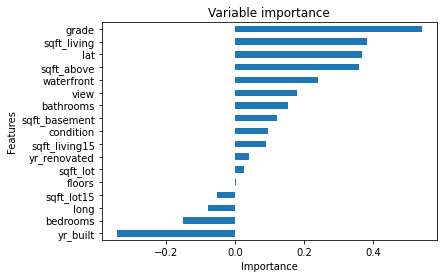

In [23]:
features.importance.plot(kind='barh')
plt.xlabel('Importance')
plt.title('Variable importance')

## Regresión Polinomial

Vamos a crear unos datos sinteticos para entender la regresión polinomial

(-3.0, 3.0, 0.0, 10.0)

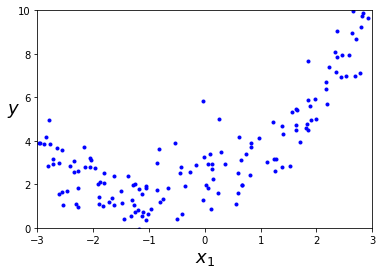

In [24]:
np.random.seed(42)
m = 150
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

Primero apliquemos una regresión lineal

Train:  0.8757198678846665


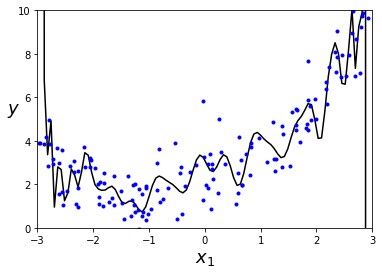

In [34]:
# Definir grado del mapeo polinomico
d = 100
model = Pipeline([
          ('poly_features', PolynomialFeatures(degree=d, include_bias=False)),
          ('std_scaler', StandardScaler()),
          ('lin_reg', LinearRegression())])
model.fit(x,y)

# Crear nuevos puntos para dibujar puntos
xnew=np.linspace(-3, 3, 100).reshape(100, 1)
ynew = model.predict(xnew)
plt.plot(xnew,ynew,'-k')

# Dibujar datos
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

print('Train: ', model.score(x,y))


## Sobreentrenamiento y subentrenamiento

In [35]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(112, 1) (38, 1) (112, 1) (38, 1)


Train:  0.8947940103287534
Test:  -5896085131935.172


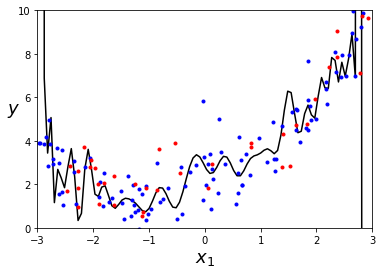

In [40]:
# Definir grado del mapeo polinomico
d = 100
model = Pipeline([
          ('poly_features', PolynomialFeatures(degree=d, include_bias=False)),
          ('std_scaler', StandardScaler()),
          ('lin_reg', LinearRegression())])
model.fit(xtrain, ytrain)

# Crear nuevos puntos para dibujar puntos
xnew=np.linspace(-3, 3, 100).reshape(100, 1)
ynew = model.predict(xnew)
plt.plot(xnew,ynew,'-k')

# Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

print('Train: ', model.score(xtrain,ytrain))
print('Test: ', model.score(xtest, ytest))


## Regularización

Primeramente usaremos el método Ridge, que es una regresión linear regularizada con L2

Train:  0.8354579771055644
Test:  0.8103722024331893


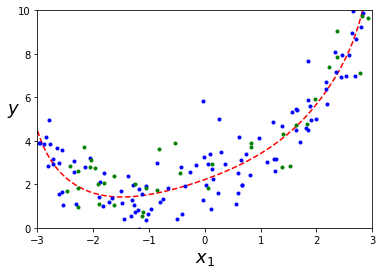

In [41]:
from sklearn.linear_model import Ridge
d = 20
model = Pipeline([
  ('poly', PolynomialFeatures(degree=d, include_bias=False)),
  ('scaler', StandardScaler()),
  ('Regressor', Ridge(alpha=2))])

model.fit(xtrain, ytrain)

# Crear nuevos puntos para dibujar puntos
xnew=np.linspace(-3, 3, 100).reshape(100, 1)
ynew = model.predict(xnew)
plt.plot(xnew,ynew,'--r')

# Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "g.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

model.fit(xtrain, ytrain)
print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

De igual manera podemo usar la norma L1, en la técnica conocida como Lasso

Train:  0.8383736428639
Test:  0.8148340758714158


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.001624411113205, tolerance: 0.0674359748539385
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.001624411113205, tolerance: 0.0674359748539385
  positive)


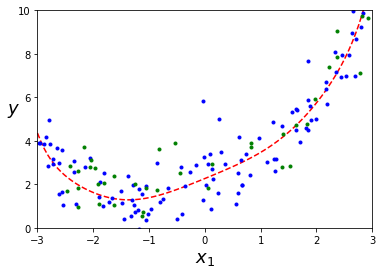

In [42]:
from sklearn.linear_model import Lasso
d = 10
model = Pipeline([
  ('poly', PolynomialFeatures(degree=d, include_bias=False)),
  ('scaler', StandardScaler()),
  ('Regressor', Lasso(alpha=0.001))])

model.fit(xtrain, ytrain)

# Crear nuevos puntos para dibujar puntos
xnew=np.linspace(-3, 3, 100).reshape(100, 1)
ynew = model.predict(xnew)
plt.plot(xnew,ynew,'--r')

# Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "g.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

model.fit(xtrain, ytrain)
print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))